Saving images (1).jpeg.jpg to images (1).jpeg (1).jpg


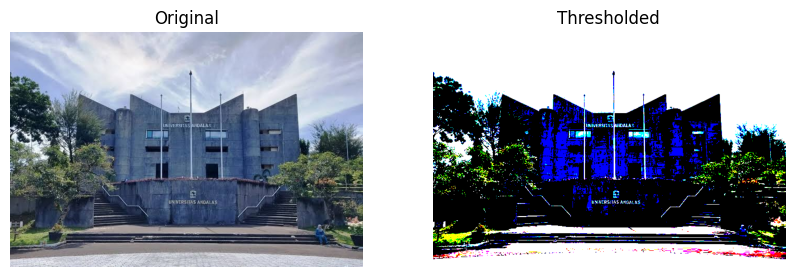

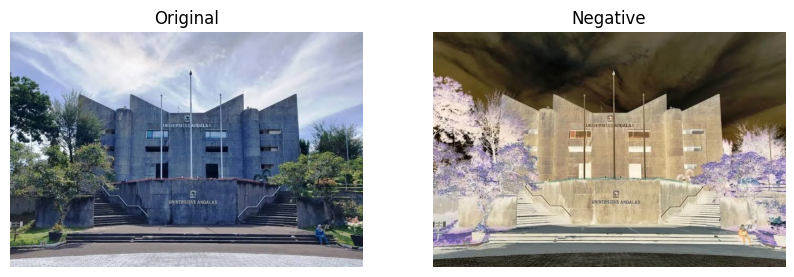

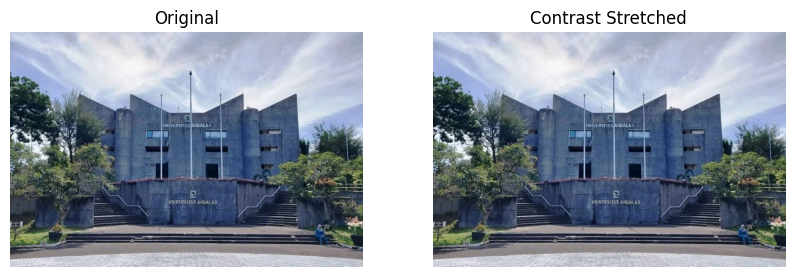

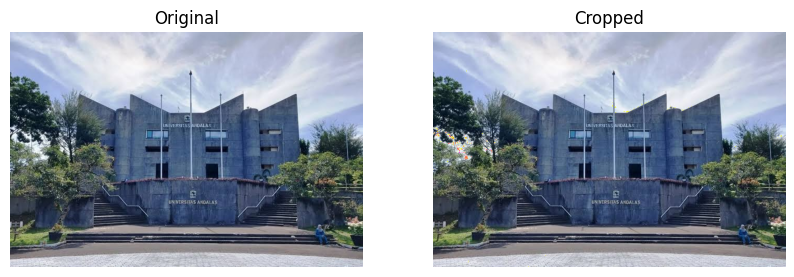

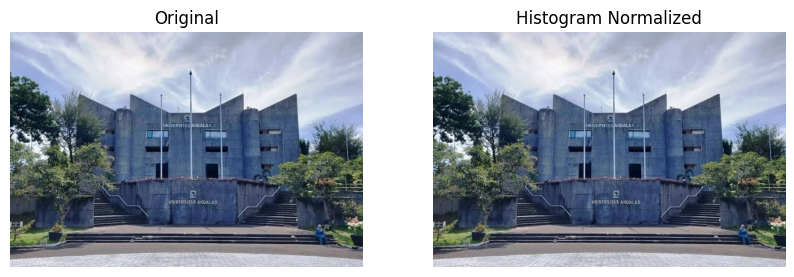

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import io

# Fungsi untuk membaca gambar berwarna
def read_image(image_path):
    return Image.open(image_path)  # Membaca gambar dalam mode warna

# Fungsi untuk mengubah gambar menjadi array numpy
def image_to_array(image):
    return np.array(image)

# Fungsi untuk segmentasi menggunakan image thresholding
def image_thresholding(image_array, threshold=128):
    return np.where(image_array > threshold, 255, 0).astype(np.uint8)

# Fungsi untuk mengubah citra menjadi negatif
def image_negative(image_array):
    return 255 - image_array

# Fungsi untuk meningkatkan kontras citra dengan contrast stretching
def contrast_stretching(image_array):
    min_val = image_array.min()
    max_val = image_array.max()
    return ((image_array - min_val) * (255 / (max_val - min_val))).astype(np.uint8)

# Fungsi untuk cropping citra menggunakan image subtraction
def image_cropping(image_array, threshold=128):
    binary_mask = image_thresholding(image_array, threshold)
    return np.maximum(0, image_array - binary_mask)

# Fungsi untuk normalisasi histogram citra
def histogram_normalization(image_array):
    min_val = image_array.min()
    max_val = image_array.max()
    return (((image_array - min_val) / (max_val - min_val)) * 255).astype(np.uint8)

# Fungsi untuk menampilkan gambar asli dan hasil processing
def plot_images(original, processed, title1="Original", title2="Processed"):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original)
    plt.title(title1)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(processed)
    plt.title(title2)
    plt.axis("off")
    plt.show()

# UPLOAD FILE SECARA MANUAL
uploaded = files.upload()

# MENGAMBIL NAMA FILE YANG DIUNGGAH
image_path = list(uploaded.keys())[0]  # Ambil nama file pertama yang di-upload

# MEMBACA DAN MEMPROSES GAMBAR
image = read_image(io.BytesIO(uploaded[image_path]))
image_array = image_to_array(image)

# Proses pengolahan citra
thresholded = image_thresholding(image_array)  # Segmentasi thresholding
negative = image_negative(image_array)  # Image negatif
contrast = contrast_stretching(image_array)  # Peningkatan kontras
cropped = image_cropping(image_array)  # Cropping menggunakan subtraction
normalized = histogram_normalization(image_array)  # Normalisasi histogram

# Menampilkan hasil pengolahan
plot_images(image, Image.fromarray(thresholded), "Original", "Thresholded")
plot_images(image, Image.fromarray(negative), "Original", "Negative")
plot_images(image, Image.fromarray(contrast), "Original", "Contrast Stretched")
plot_images(image, Image.fromarray(cropped), "Original", "Cropped")
plot_images(image, Image.fromarray(normalized), "Original", "Histogram Normalized")
